In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

2022-11-02 15:49:01.893602: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 15:49:02.418141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-02 15:49:02.418197: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-02 15:49:02.495592: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-02 15:49:04.419860: W tensorflow/stream_executor/platform/de

In [2]:
# Modelo
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

2022-11-02 15:49:10.544252: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-02 15:49:10.544722: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-02 15:49:10.544807: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (22481768ce44): /proc/driver/nvidia/version does not exist
2022-11-02 15:49:10.546678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Loading data
# Se cargan todas las imagenes en un diccionario imgs redimensionadas a 100x100
data_dir = './data'
imgs = {}
for image_class in os.listdir(data_dir):
    imgs[image_class] = {}
    for image in os.listdir(os.path.join(data_dir, image_class)):
        im = cv2.imread(os.path.join(data_dir, image_class, image))
        im = cv2.resize(im, (100, 100))
        imgs[image_class][image] = im

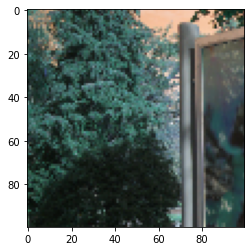

In [4]:
plt.imshow(imgs['Cover']['00001.jpg'])

In [5]:
# Training
# Se dividen las imagenes en dos grupos
# 0 -> imagenes normales
# 1 -> imagenes con estegranografia
# Luego se agregan a las lista donde X: imagen, Y: categoria de la imagen (0 / 1)
size = len(imgs['Cover'])
X = []
Y = []
for img in sorted(imgs['Cover'].keys()):
    img_number = int(img.split('.')[0])
    if img_number < size/2:
        X.append(imgs['Cover'][img])
        Y.append(0)
    else:
        X.append(imgs['JMiPOD'][img])
        Y.append(1)

In [6]:
# Se redimensionan los arrays como si fuera una matriz (tensor) 4D donde
# las dimensiones son
# 1. cantidad de imagenes
# 2. alto de imagen: 100
# 3. ancho de imagen: 100
# 4. canales de la imagen (RGB): 3
# sirve pensarlo como una lista de listas
X = np.array(X).reshape(len(X), 100, 100, 3)
Y = np.array(Y).reshape(len(X), 1)

In [7]:
# Ajuste del modelo
model.fit(X, Y, epochs = 5, batch_size = 64)

2022-11-02 15:49:22.366161: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27630000 exceeds 10% of free system memory.


Epoch 1/5


2022-11-02 15:49:23.482447: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 78675968 exceeds 10% of free system memory.
2022-11-02 15:49:23.599153: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19668992 exceeds 10% of free system memory.
2022-11-02 15:49:23.623263: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18096128 exceeds 10% of free system memory.
2022-11-02 15:49:23.689146: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18096128 exceeds 10% of free system memory.


15/15 [==============================] - 9s 505ms/step - loss: 103.9313 - accuracy: 0.5288
Epoch 2/5
15/15 [==============================] - 7s 484ms/step - loss: 0.7869 - accuracy: 0.5288
Epoch 3/5
15/15 [==============================] - 8s 517ms/step - loss: 0.6672 - accuracy: 0.6091
Epoch 4/5
15/15 [==============================] - 7s 490ms/step - loss: 0.6268 - accuracy: 0.6276
Epoch 5/5
15/15 [==============================] - 7s 497ms/step - loss: 0.5297 - accuracy: 0.7275


In [8]:
# Test con imagen normal
x = np.array(imgs['Cover']['00097.jpg']).reshape(1, 100, 100, 3)
model.predict(x)

1/1 [==============================] - 0s 165ms/step


array([[0.13446805]], dtype=float32)

In [9]:
# Test con imagen estego
x = np.array(imgs['JMiPOD']['00096.jpg']).reshape(1, 100, 100, 3)
model.predict(x)

1/1 [==============================] - 0s 38ms/step


array([[0.21796885]], dtype=float32)

In [10]:
# Exportar el modelo en formato H5 (HDF5)
model.save('model/model.h5')